In [93]:
# Basic setup
%run ./config.ipynb

Cortex Python SDK v6.2.0
Cortex Discovery Libraries v3.4.17


In [95]:
tr = Transition.from_env("telco-churn", has_contract=False)
tr.set_source_uri('s3://lk-datasets/kaggle/WA_Fn-UseC_-Telco-Customer-Churn.csv')
tr.set_persist()
tr.set_description("Telco Churn Dataset")

In [123]:
tr = Transition.from_env('telco-churn')
df = tr.load_source_canonical()

In [124]:
tr.canonical_report(df)

,Attributes (21),dType,%_Null,%_Dom,Count,Unique,Observations
0,Churn,object,0.0%,73.5%,7043,2,Sample: No | Yes
1,Contract,object,0.0%,55.0%,7043,3,Sample: Month-to-month | Two year | One year
2,Dependents,object,0.0%,70.0%,7043,2,Sample: No | Yes
3,DeviceProtection,object,0.0%,43.9%,7043,3,Sample: No | Yes | No internet service
4,InternetService,object,0.0%,44.0%,7043,3,Sample: Fiber optic | DSL | No
5,MonthlyCharges,float64,0.0%,0.9%,7043,1585,max=118.75 | min=18.25 | mean=64.76 | dominant=20.05
6,MultipleLines,object,0.0%,48.1%,7043,3,Sample: No | Yes | No phone service
7,OnlineBackup,object,0.0%,43.8%,7043,3,Sample: No | Yes | No internet service
8,OnlineSecurity,object,0.0%,49.7%,7043,3,Sample: No | Yes | No internet service
9,PaperlessBilling,object,0.0%,59.2%,7043,2,Sample: Yes | No


In [126]:
df = tr.tools.auto_transition(df)

In [127]:
tr.canonical_report(df)

,Attributes (21),dType,%_Null,%_Dom,Count,Unique,Observations
0,Churn,category,0.0%,73.5%,7043,2,Sample: No | Yes
1,Contract,category,0.0%,55.0%,7043,3,Sample: Month-to-month | Two year | One year
2,Dependents,category,0.0%,70.0%,7043,2,Sample: No | Yes
3,DeviceProtection,category,0.0%,43.9%,7043,3,Sample: No | Yes | No internet service
4,InternetService,category,0.0%,44.0%,7043,3,Sample: Fiber optic | DSL | No
5,MonthlyCharges,float64,0.0%,0.9%,7043,1585,max=118.75 | min=18.25 | mean=64.76 | dominant=20.05
6,MultipleLines,category,0.0%,48.1%,7043,3,Sample: No | Yes | No phone service
7,OnlineBackup,category,0.0%,43.8%,7043,3,Sample: No | Yes | No internet service
8,OnlineSecurity,category,0.0%,49.7%,7043,3,Sample: No | Yes | No internet service
9,PaperlessBilling,category,0.0%,59.2%,7043,2,Sample: Yes | No


In [128]:
tr.report_quality_summary(df)

,report,summary,result
0,score,quality_avg,78%
1,,usability_avg,100%
2,,provenance_complete,0%
3,,data_described,0%
4,data_shape,rows,7043
5,,columns,21
6,,memory,1.05MB
7,data_type,numeric,1
8,,category,17
9,,datetime,0


In [103]:
tr.run_component_pipeline()

In [104]:
df = tr.load_persist_canonical()
df.shape

(7043, 21)

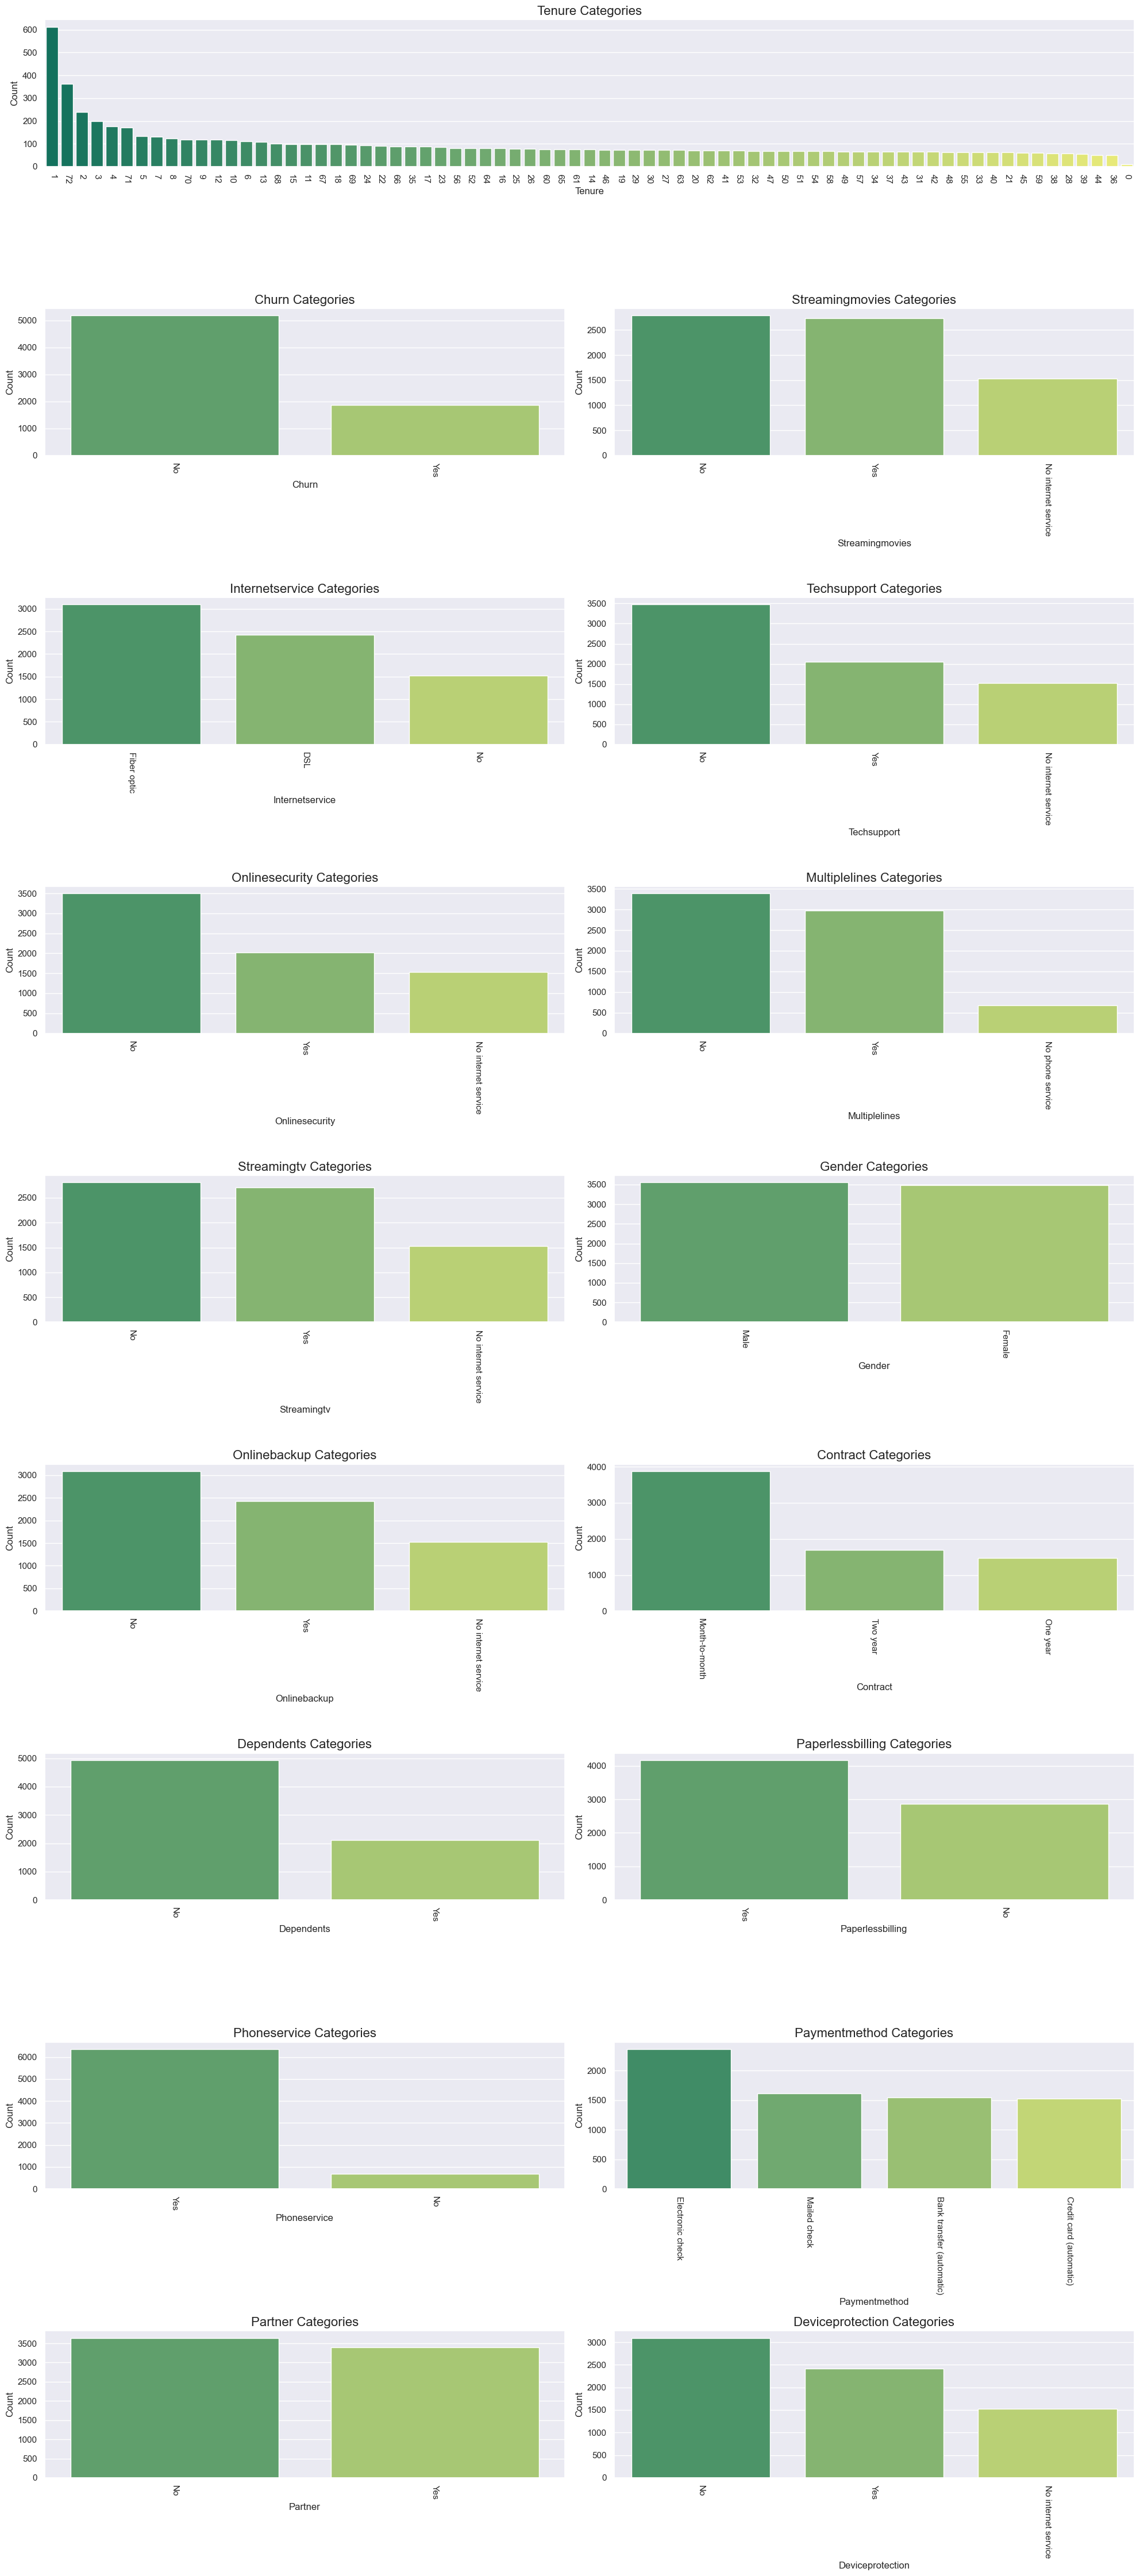

<Figure size 1800x900 with 0 Axes>

In [105]:
tr.visual.show_categories(df)

In [168]:
cat_features = df[["Churn","Contract","StreamingMovies","PhoneService","DeviceProtection","TechSupport","gender","Partner","MultipleLines","Dependents","OnlineBackup","StreamingMovies","OnlineSecurity","StreamingTV","PaperlessBilling","PaymentMethod","InternetService"]]
cat_features.head()
cat_features.shape

(7043, 17)

In [169]:
tr.visual.show_confusion_matrix()



Signature:
tr.visual.show_confusion_matrix(
    test_labels,
    predictions,
    classes,
    normalize=False,
    title=None,
    cmap=None,
)
Docstring:
This function prints and plots the confusion matrix.
Normalization can be applied by setting `normalize=True`.
File:      ~/opt/anaconda3/lib/python3.9/site-packages/ds_discovery/components/discovery.py
Type:      function


In [119]:
df_dummy_cat = pd.get_dummies(cat_features)
df_dummy_cat.head()

,Churn_No,Churn_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PhoneService_No,PhoneService_Yes,...,StreamingTV_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,0,1,0,0,1,0,...,0,0,1,0,0,1,0,1,0,0
1,1,0,0,1,0,1,0,0,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,1,1,0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,1,0,0
3,1,0,0,1,0,1,0,0,1,0,...,0,1,0,1,0,0,0,1,0,0
4,0,1,1,0,0,1,0,0,0,1,...,0,0,1,0,0,1,0,0,1,0


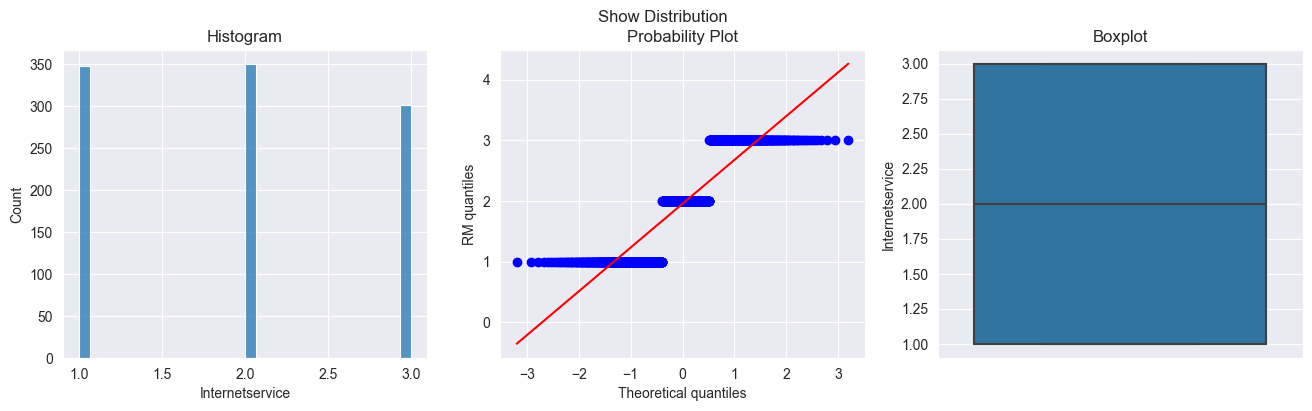

<Figure size 1800x900 with 0 Axes>

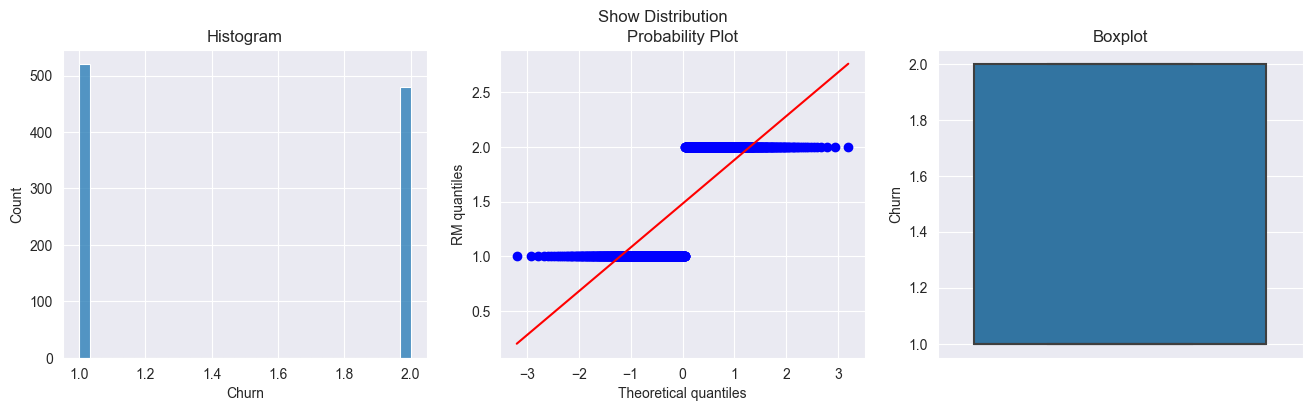

<Figure size 1800x900 with 0 Axes>

In [60]:
sample_size = 1000
builder = SyntheticBuilder.from_memory('')
wrangler = Wrangle.from_memory()
df = pd.DataFrame(index=range(sample_size))
df['Internetservice'] = builder.tools.get_category(selection=['Fiber optic','DSL','No'],size=sample_size)
df['Churn'] = builder.tools.get_category(selection=['No','Yes'],size=sample_size)
df_encoded = wrangler.tools.model_encode_ordinal(df, headers=['Internetservice','Churn'])
tr.visual.show_distribution(df_encoded,'Internetservice')
tr.visual.show_distribution(df_encoded,'Churn')


In [149]:
df.shape

(7043, 21)

In [161]:
_selection=np.unique(df[['InternetService','DeviceProtection']]).tolist()
print(_selection)
df_encoded = wrangler.tools.model_encode_ordinal(df, headers=["InternetService","DeviceProtection"])
df_encoded.head()


['DSL', 'Fiber optic', 'No', 'No internet service', 'Yes']


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,False,Yes,No,1,No,No phone service,3,No,...,2,No,No,No,Month-to-month,Yes,Electronic check,29.850,29.85,No
1,5575-GNVDE,Male,False,No,No,34,Yes,No,1,Yes,...,2,No,No,No,One year,No,Mailed check,56.950,1889.5,No
2,3668-QPYBK,Male,False,No,No,2,Yes,No,3,Yes,...,1,No,No,No,Month-to-month,Yes,Mailed check,53.850,108.15,Yes
3,7795-CFOCW,Male,False,No,No,45,No,No phone service,1,Yes,...,1,Yes,No,No,One year,No,Bank transfer (automatic),42.300,1840.75,No
4,9237-HQITU,Female,False,No,No,2,Yes,No,1,No,...,3,No,No,No,Month-to-month,Yes,Electronic check,70.700,151.65,Yes


In [155]:
df["Churn"].head()

0     No
1     No
2    Yes
3     No
4    Yes
Name: Churn, dtype: category
Categories (2, object): ['No', 'Yes']

In [158]:
_selection2=np.unique(df[['MultipleLines']]).tolist()
print(_selection2)
df_churn = wrangler.tools.model_encode_ordinal(df, headers=["MultipleLines"])
df_churn.head()

['No', 'No phone service', 'Yes']


AttributeError: 'Categorical' object has no attribute 'sort'

In [138]:
df['DeviceProtection'] = builder.tools.get_category(selection=np.unique(df['DeviceProtection']).tolist(), size = len(df.index),column_name='DeviceProtection')
df['DeviceProtection'].head()

0    No internet service
1    No internet service
2                     No
3                     No
4                    Yes
Name: DeviceProtection, dtype: object

In [139]:
builder = SyntheticBuilder.from_env('telco-churn')
#df = pd.DataFrame()
df['InternetService'] = builder.tools.get_category(selection=_selection,column_name='InternetService',size=len(df.index))
df.shape


(7043, 21)

In [87]:
builder.report_intent()

,level,order,intent,parameters,creator
0,InternetService,0,get_category,"[""selection=['DSL', 'Fiber optic', 'No']"", ""column_name='InternetService'""]",lkrishna
